In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
m = 0.4123
c = 1.21

In [94]:
line_from_x = lambda x: m * x + c
line_from_y = lambda y: (y - c)/m 

x = np.arange(0, 11)
y = x
y_l = line_from_x(x)
x_l = line_from_y(y)

In [95]:
X, Y = np.meshgrid(x, y)
Y_l = line_from_x(X)
X_l = line_from_y(Y)

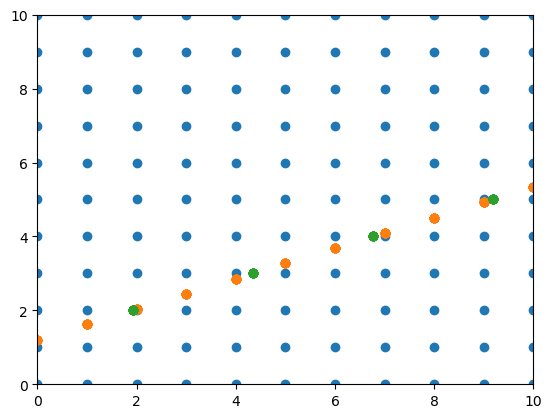

In [96]:
plt.scatter(X, Y)
plt.scatter(X, Y_l)
plt.scatter(X_l, Y)
plt.xlim([0, 10])
plt.ylim([0, 10]);

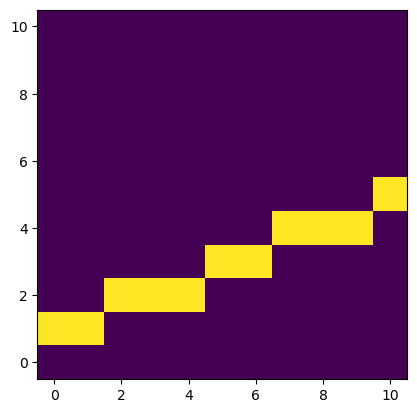

In [97]:
Ty = np.logical_and(Y <= Y_l, Y_l < Y + 1)
plt.imshow(Ty, origin='lower')

In [98]:
yc = np.where(Ty, Y_l, 0)[:-1, :-1]
xc = np.where(Ty, X, 0)[:-1, :-1]
I1 = np.dstack([xc, yc])


In [99]:
I1.shape

(10, 10, 2)

In [100]:
I2 = np.dstack([np.where(Ty, X, 0), np.where(Ty, Y_l, 0)])[1:, :-1]

In [101]:
Tx = np.logical_and(X <= X_l, X_l < X + 1)

In [102]:
I3 = np.dstack([np.where(Tx, X_l, 0), np.where(Tx, Y, 0)])[:-1, :-1]

In [103]:
I4 = np.dstack([np.where(Tx, X_l, 0), np.where(Tx, Y, 0)])[:-1, 1:]

In [108]:
I = np.abs(np.abs(I1 - I2) - np.abs(I3 - I4))
magnitude = lambda xy: np.sqrt(xy[0]**2 + xy[1]**2)

A = np.apply_along_axis(magnitude, 2, I)

In [116]:
A

array([[ 1.21      ,  1.90574324,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.21      ,  1.90574324,  2.85299792,  3.87134597,  4.91681041,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 2.76972283,  2.76972283,  2.85299792,  3.87134597,  4.91681041,
         5.97517466,  7.04062373,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  5.27717849,  5.27717849,
         5.97517466,  7.04062373,  8.11036591,  9.18290099, 10.2573529 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         7.86073595,  7.86073595,  8.11036591,  9.18290099, 10.2573529 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 10.46417867, 10.46417867],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

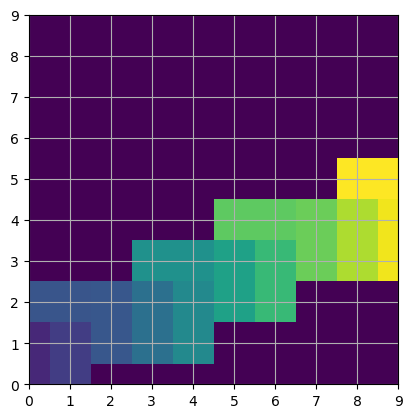

In [115]:
plt.imshow(A, origin='lower')
plt.xlim([0, 9])
plt.ylim([0, 9])
plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10))
plt.grid(visible=True)